# Bank Management System

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
ClientNames = ['John', 'Harry', 'Steve','Elle Oneill','Tristan Short','Teagan Gibson','Athena Werner','Rene Fields','Jaylen Khan','Nicolas Wall']
ClientPins = ['082671', '124222','998123','124856', '253698', '457813', '657489', '416937', '5146367', '568964']
ClientBalances = [102000, 225000, 350000, 43900, 160000, 334500, 99000, 12900, 75000, 80000]
OpenedOn = ['09/05/2018, 13:38:52','10/15/2020, 16:55:40','07/23/2019, 19:42:52','08/09/2002, 22:24:12', '14/10/2017, 15:14:03','27/08/2020, 20:45:12', '25/06/2015, 16:15:11', '09/09/2018, 22:55:09', '26/12/2018, 23:56:19', '30/11/2019, 12:29:45']
Country = ['India','India','Canada','Australia', 'Russia', 'India', 'Russia', 'Australia', 'Canada', 'Germany']
Age = [35,40,27,56,45,74,27,28,28,35]

ClientDeposition = 0
ClientWithdrawal = 0
ClientBalance = 0
disk1 = 1
disk2 = 10
u = 0

country_index = ['India','Canada','Australia','Russia','Germany']
country_counter = []

Emp_User = ['DNS@001','DNS@002', 'DNS@003']
Emp_Pass = ['a$DNS@001','b$DNS002','c$DNS003']

In [3]:
#Encrypt all the pins and display only last digit
EncryptedPins = []
for x in ClientPins:
    key = str(x)
    final_key = "*****" + key[5]
    EncryptedPins.append(final_key)
    
Bank_System = pd.DataFrame({'Client Name': ClientNames,'Age':Age,'Country':Country,'PIN': EncryptedPins, 'A/C Balance': ClientBalances ,'A/C Opening Date': OpenedOn})
Bank_System.to_csv('Bank Database.csv',index = False)
    
while True:
    print("\t\t\t\t __________________________________________________________________")
    print("\t\t\t\t|                WELCOME TO DNS BANKING SYSTEM                     |")
    print("\t\t\t\t|                  ~ The Power of Possible ~                       |")
    print("\t\t\t\t|__________________________________________________________________|")
    print("\t\t\t\t|                a. Open New Client Account                        |")
    print("\t\t\t\t|                b. Withdraw From Account                          |")
    print("\t\t\t\t|                c. Deposit to Account                             |")
    print("\t\t\t\t|                d. Check Clients & Balance (Employees Only)       |")
    print("\t\t\t\t|                e. Quit                                           |")
    print("\t\t\t\t|__________________________________________________________________|")

    EnterLetter = input("Select an option from the Menu : ")

    if EnterLetter == "a" or EnterLetter == "A": #Client Registration
        NumberOfClient = eval(input("Number of Clients : "))
        u = u + NumberOfClient

        if u > 5:
            print("\n")
            print("Client registration limit exceeded!")
            u = u - NumberOfClient
        else:
            while disk1 <= u:
                print("\nRegistration for Client",disk1,":")
                name = input("Enter your full name : ")
                ClientNames.append(name)
                age = input("Enter your age : ")
                Age.append(age)
                country = input("Enter your country : ")
                if country not in Country:
                    country_index.append(country)
                Country.append(country)
                    
                pin = str(input("Enter a 6-digit PIN to secure your account : "))
                check = str(input("Re-enter the 6-digit PIN : "))
                if(check == pin):
                    ClientPins.append(pin)
                else:
                    while(pin != check):
                        check = str(input("Incorrect PIN! Re-enter the 6-digit PIN : "))
                    if(check == pin):
                        ClientPins.append(pin)
                    
                Client_Balance = 0
                Client_Deposition = eval(input("A minimum amount of 1000 is required to open an account : "))
                Client_Balance += Client_Deposition
                ClientBalances.append(Client_Balance)
                
                now = datetime.now() # current date and time
                year = now.strftime("%Y")
                month = now.strftime("%m")
                day = now.strftime("%d")
                time = now.strftime("%H:%M:%S")

                date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
                OpenedOn.append(date_time)
                
                print("\n===============================================================================================")
                print("\n\tName : ", end=" ")
                print(ClientNames[disk2])
                print("\tAge : ", age)
                print("\tCountry : ", country)
                print("\tBalance : Rs. ", end=" ")
                print(ClientBalances[disk2], end=" ")
                disk1 = disk1 + 1
                disk2 = disk2 + 1
                print("\n\tAccount created on : ",date_time)
                print("\n\t//Name added to database//")
                print("\t//PIN added to database//")
                print("\t//Balance added to database//")
                print("\n\t------ACCOUNT CREATED SUCCESSFULLY !------")
                print("\n")
                print("\tNOTE: NEVER SHARE YOUR PIN & OTP WITH ANYONE.")
                print("\t      YOUR BANK NEVER ASKS FOR YOUR PIN & OTP.")
                print("\n===============================================================================================")
                
                key = "*****" + pin[5]
                EncryptedPins.append(key)
                df = pd.DataFrame({'Client Name': name,'Age':age,'Country':country,'PIN': key, 'A/C Balance': Client_Balance ,'A/C Opening Date': date_time}, index = [disk2 -1])
                df.to_csv('Bank Database.csv', mode='a', header=False, index = False)
        mainMenu = input("Press enter to go back to the Main Menu.")
   
    elif EnterLetter == "b" or EnterLetter == "B": #Withdraw Amount
        v = 0
        while v < 1:
            w = -1
            name = input("Enter A/C holder name : ")
            pin = input("Enter your PIN : ")
            while w < len(ClientNames) - 1:
                w = w + 1
                if name == ClientNames[w]:
                    if pin == ClientPins[w]:
                        v = v + 1 #Account Authorised
                        print("~Login Successful!~\n")
                        
                        print("Current Balance: Rs.", end=" ")
                        print(ClientBalances[w], end=" ")
                        print("\n")
                        ClientBalance = (ClientBalances[w])
                        ClientWithdrawal = eval(input("Enter Withdrawal amount : "))
                        if ClientWithdrawal > ClientBalance:
                            print("----INSUFFICIENT ACCOUNT BALANCE!----")
                            print("Balance: Rs.", ClientBalance, end=" ")
                            print("\n\n")
                        else:
                            ClientBalance = ClientBalance - ClientWithdrawal
                            print("\n")
                            print("----Withdraw Successful!----")
                            ClientBalances[w] = ClientBalance
                            print("Updated Balance: Rs. ", ClientBalance, end=" ")
                            print("\n")
                            df = pd.read_csv('Bank Database.csv')
                            df.at[w,'A/C Balance']=ClientBalance
                            df.to_csv('Bank Database.csv', index=False)
            if v < 1:
                print("Incorrect Name or PIN!\n")
                break
        mainMenu = input("Press Enter to logout & go back to the Main Menu.")
    
    elif EnterLetter == "c" or EnterLetter == "C": # Deposit Amount
        x = 0
        while x < 1:
            w = -1
            name = input("Enter A/C holder name : ")
            pin = input("Enter your PIN : ")
            while w < len(ClientNames) - 1:
                w = w + 1
                if name == ClientNames[w]:
                    if pin == ClientPins[w]:
                        x = x + 1 #Account Authorised
                        print("~Login Successful!~\n")
                        
                        print("Current Balance: Rs.", end=" ")
                        print(ClientBalances[w], end=" ")
                        ClientBalance = (ClientBalances[w])
                        print("\n")
                        ClientDeposition = eval(input("Enter deposit amount : "))
                        ClientBalance = ClientBalance + ClientDeposition
                        ClientBalances[w] = ClientBalance
                        print("\n")
                        print("----Deposition successful!----")
                        print("Updated Balance: Rs.", ClientBalance, end=" ")
                        print("\n")
                        df = pd.read_csv('Bank Database.csv')
                        df.at[w,'A/C Balance']=ClientBalance
                        df.to_csv('Bank Database.csv', index=False)
            if x < 1:
                print("Incorrect Name or PIN!!\n")
                break
        mainMenu = input("Press Enter to logout & go back to the Main Menu.")
    
    elif EnterLetter == "d" or EnterLetter == "D": # View Account Holders
        z = 0
        while z < 1:
            n = -1
            u = input("Enter Employee Username : ")
            p = input("Enter Employee Password : ")
            while n < len(Emp_User) - 1:
                n = n + 1
                if u == Emp_User[n]:
                    if p == Emp_Pass[n]:
                        z = z + 1 #Account Authorised
                        print("~Login Successful!~\n")
                        
                        df = pd.read_csv('Bank Database.csv')    
                        display(df[['Client Name','A/C Balance']])
                
            if z < 1:
                print("Incorrect User or Pass!\n")
                break
            
        mainMenu = input("Press Enter to logout & go back to the Main Menu.")
    
    elif EnterLetter == "e" or EnterLetter == "E": #Exit
        print("Thank you for visiting DNS Banking System!")
        print("\n")
        break
    else:
        print("Invalid option selected!")
        print("Please Try again!")

        mainMenu = input("Press Enter to go back to the Main Menu.")

        

				 __________________________________________________________________
				|                WELCOME TO DNS BANKING SYSTEM                     |
				|                  ~ The Power of Possible ~                       |
				|__________________________________________________________________|
				|                a. Open New Client Account                        |
				|                b. Withdraw From Account                          |
				|                c. Deposit to Account                             |
				|                d. Check Clients & Balance (Employees Only)       |
				|                e. Quit                                           |
				|__________________________________________________________________|
Select an option from the Menu : a
Number of Clients : 3

Registration for Client 1 :
Enter your full name : Nipun
Enter your age : 20
Enter your country : India
Enter a 6-digit PIN to secure your account : 007007
Re-enter the 6-digit PIN : 007007
A minimum amount of 100

,Client Name,A/C Balance
0,John,102000
1,Harry,225000
2,Steve,350000
3,Elle Oneill,43900
4,Tristan Short,160000
5,Teagan Gibson,334500
6,Athena Werner,99000
7,Rene Fields,12900
8,Jaylen Khan,75000
9,Nicolas Wall,80000


Press Enter to logout & go back to the Main Menu.
				 __________________________________________________________________
				|                WELCOME TO DNS BANKING SYSTEM                     |
				|                  ~ The Power of Possible ~                       |
				|__________________________________________________________________|
				|                a. Open New Client Account                        |
				|                b. Withdraw From Account                          |
				|                c. Deposit to Account                             |
				|                d. Check Clients & Balance (Employees Only)       |
				|                e. Quit                                           |
				|__________________________________________________________________|
Select an option from the Menu : e
Thank you for visiting DNS Banking System!




## Data Visualisation of Bank_System Data Frame

In [4]:
Bank_System = pd.read_csv('Bank Database.csv')

In [5]:
Bank_System

,Client Name,Age,Country,PIN,A/C Balance,A/C Opening Date
0,John,35,India,*****1,102000,"09/05/2018, 13:38:52"
1,Harry,40,India,*****2,225000,"10/15/2020, 16:55:40"
2,Steve,27,Canada,*****3,350000,"07/23/2019, 19:42:52"
3,Elle Oneill,56,Australia,*****6,43900,"08/09/2002, 22:24:12"
4,Tristan Short,45,Russia,*****8,160000,"14/10/2017, 15:14:03"
5,Teagan Gibson,74,India,*****3,334500,"27/08/2020, 20:45:12"
6,Athena Werner,27,Russia,*****9,99000,"25/06/2015, 16:15:11"
7,Rene Fields,28,Australia,*****7,12900,"09/09/2018, 22:55:09"
8,Jaylen Khan,28,Canada,*****6,75000,"26/12/2018, 23:56:19"
9,Nicolas Wall,35,Germany,*****4,80000,"30/11/2019, 12:29:45"


In [6]:
if(len(country_counter)<(len(country_index))):
    country_counter = []
    for i in range(len(country_index)):
        k = 0
        for j in range(len(Country)):
            if(str(country_index[i]) == str(Country[j])):
                k = k+1
        country_counter.append(k)

print(country_counter)

[6, 2, 2, 2, 1]


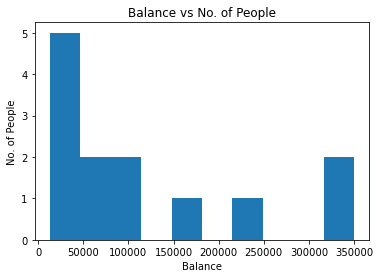

In [7]:
plt.hist(Bank_System["A/C Balance"])
plt.xlabel("Balance")
plt.ylabel("No. of People")
plt.title("Balance vs No. of People")
plt.show()

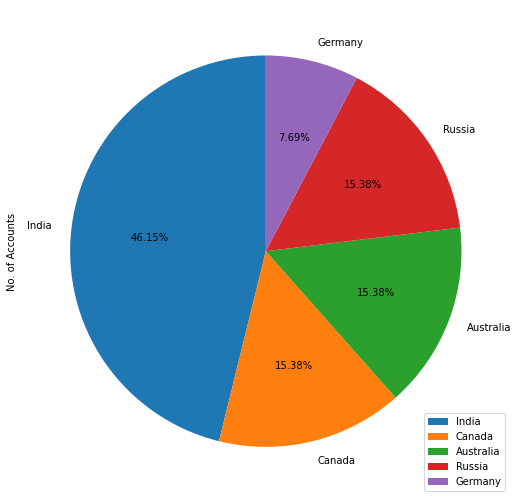

In [8]:
df = pd.DataFrame({'No. of Accounts':country_counter},index = country_index)
plot = df.plot.pie(y ="No. of Accounts",figsize=(10, 5),autopct='%1.2f%%', startangle=90)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()